In [45]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [46]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [47]:
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [48]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


In [49]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(244, 12)


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [53]:
# 랜덤한 w(여기선피처가 12개라)와, 상수 b
import numpy as np
W = np.random.rand(12)
b = np.random.rand()

In [54]:
# y=w1x1+w2x2+w3x3+w4x4+w5x5+w6x6+w7x7+w8x8+w9x9+w10x10+w11x11+w12x12+b

def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    print(X.shape)
    print(W.shape)
    predictions += b
    return predictions

In [55]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [56]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

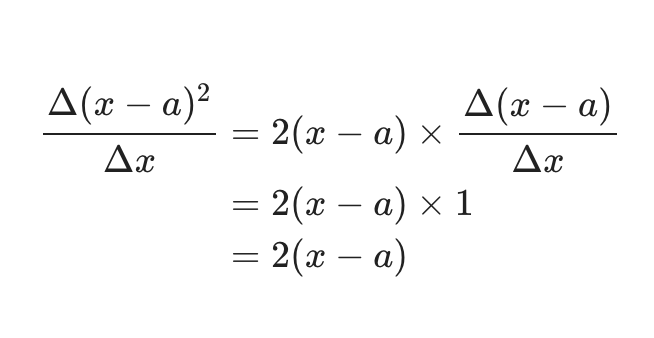

In [57]:
LEARNING_RATE = 0.0001

In [58]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [61]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    print('a',dW,'b',db)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

(195, 12)
(12,)
a [-0.05698996  0.26453208  0.16569658  0.01213639  0.15598606  0.02184691
 -0.11355483  0.05409733  0.27003335 -0.03274289 -0.07712091  0.25495388] b 0.1778329688628713
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05697956  0.26447368  0.16567497  0.0121338   0.15597413  0.02183465
 -0.1135447   0.0540951   0.27000781 -0.03274944 -0.07711217  0.25492095] b 0.17780877868072342
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05696916  0.26441529  0.16565337  0.01213122  0.15596219  0.0218224
 -0.11353456  0.05409288  0.26998227 -0.032756   -0.07710343  0.25488802] b 0.17778459288397397
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05695876  0.26435691  0.16563177  0.01212864  0.15595026  0.02181016
 -0.11352443  0.05409065  0.26995674 -0.03276255 -0.07709468  0.25485509] b 0.17776041147170885
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05694837  0.26429854  0.16561018  0.01212606  0.15593832  0.02179791
 -0.1135143   0.05408843  0.2699312  -0.0327691  -0.07708594  0.25482217] b 0.17773623444301445
(19

 -0.11233188  0.05382909  0.2669612  -0.03352088 -0.07606466  0.25100219] b 0.17493753354849326
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05573625  0.25749916  0.16308548  0.01182838  0.15453319  0.02038068
 -0.1123218   0.05382689  0.26693597 -0.03352718 -0.07605594  0.25096981] b 0.17491386742771092
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.0557261   0.25744228  0.16306429  0.01182592  0.15452131  0.0203689
 -0.11231172  0.05382468  0.26691073 -0.03353348 -0.07604723  0.25093743] b 0.1748902055832846
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05571595  0.25738541  0.16304309  0.01182346  0.15450943  0.02035712
 -0.11230164  0.05382247  0.2668855  -0.03353978 -0.07603852  0.25090506] b 0.17486654801432525
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05570581  0.25732855  0.1630219   0.01182099  0.15449755  0.02034534
 -0.11229156  0.05382026  0.26686027 -0.03354608 -0.0760298   0.2508727 ] b 0.1748428947199438
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05569566  0.2572717   0.16300071  0.01181853  0.15448567 

 -0.11117562  0.05357601  0.26407554 -0.03423219 -0.07506435  0.24730809] b 0.1722437429874937
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05458223  0.25103721  0.1606693   0.01155126  0.15316995  0.01905061
 -0.11116559  0.05357382  0.26405059 -0.03423825 -0.07505567  0.24727623] b 0.17222056286739473
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05457231  0.25098172  0.16064848  0.01154891  0.15315812  0.01903926
 -0.11115556  0.05357163  0.26402564 -0.03424432 -0.07504699  0.24724437] b 0.1721973869226705
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05456239  0.25092624  0.16062766  0.01154655  0.1531463   0.01902792
 -0.11114553  0.05356943  0.2640007  -0.03425038 -0.0750383   0.24721252] b 0.17217421515245585
(195, 12)
(12,)
Iteration 240 : Loss 1.2352
(195, 12)
(12,)
a [-0.05455248  0.25087077  0.16060685  0.0115442   0.15313447  0.01901658
 -0.11113551  0.05356724  0.26397576 -0.03425644 -0.07502962  0.24718067] b 0.17215104755588614
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05454256  0.25081532  0.1605

(12,)
(195, 12)
(12,)
a [-0.05338666  0.24435494  0.15815289  0.01127077  0.15173057  0.01769309
 -0.10994569  0.0533073   0.26102551 -0.03496346 -0.07399864  0.24342229] b 0.16942365543741786
(195, 12)
(12,)
Iteration 360 : Loss 1.2317
(195, 12)
(12,)
a [-0.05337698  0.24430089  0.15813246  0.01126853  0.1517188   0.01768218
 -0.10993572  0.05330512  0.26100086 -0.03496929 -0.07398999  0.24339098] b 0.16940098244137042
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.0533673   0.24424685  0.15811203  0.01126628  0.15170703  0.01767128
 -0.10992575  0.05330295  0.26097622 -0.03497511 -0.07398135  0.24335966] b 0.1693783135154835
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05335763  0.24419283  0.15809161  0.01126404  0.15169526  0.01766038
 -0.10991578  0.05330077  0.26095158 -0.03498093 -0.0739727   0.24332835] b 0.1693556486589144
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05334795  0.24413881  0.15807119  0.0112618   0.1516835   0.01764949
 -0.10990581  0.0532986   0.26092695 -0.03498674 -0.07396406  0.2

(12,)
a [-0.05216325  0.23753048  0.15556345  0.01099085  0.15022816  0.01632614
 -0.10867347  0.05302981  0.25789093 -0.03569296 -0.07289454  0.23944885] b 0.16655430812114017
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05215382  0.2374779   0.15554343  0.01098872  0.15021646  0.01631569
 -0.10866356  0.05302765  0.2578666  -0.03569854 -0.07288594  0.23941809] b 0.1665321493100234
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05214438  0.23742534  0.1555234   0.01098659  0.15020475  0.01630524
 -0.10865365  0.05302549  0.25784227 -0.03570411 -0.07287733  0.23938733] b 0.16650999446255169
(195, 12)
(12,)
Iteration 490 : Loss 1.2280
(195, 12)
(12,)
a [-0.05213495  0.23737278  0.15550338  0.01098447  0.15019305  0.01629479
 -0.10864374  0.05302333  0.25781794 -0.03570968 -0.07286873  0.23935657] b 0.16648784357790444
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05212552  0.23732024  0.15548336  0.01098234  0.15018134  0.01628435
 -0.10863384  0.05302117  0.25779361 -0.03571525 -0.07286012  0.23932582] b 0.16

 -0.1074389   0.05276091  0.25486813 -0.03637522 -0.07182151  0.23563643] b 0.16381491602816317
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.0509891   0.23099406  0.15306413  0.01072912  0.1487572   0.01503605
 -0.10742906  0.05275877  0.2548441  -0.03638056 -0.07181295  0.2356062 ] b 0.16379324637124495
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.0509799   0.23094289  0.15304448  0.0107271   0.14874556  0.01502602
 -0.10741922  0.05275663  0.25482007 -0.0363859  -0.07180439  0.23557597] b 0.16377158057680183
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.0509707   0.23089174  0.15302484  0.01072507  0.14873392  0.015016
 -0.10740937  0.05275448  0.25479605 -0.03639124 -0.07179583  0.23554575] b 0.1637499186440357
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05096151  0.23084059  0.15300521  0.01072305  0.14872227  0.01500599
 -0.10739953  0.05275234  0.25477202 -0.03639657 -0.07178727  0.23551553] b 0.1637282605721481
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.05095231  0.23078945  0.15298558  0.01072103  0.14871063  

a [-0.04996988  0.22533102  0.15088297  0.01050753  0.14745646  0.01393404
 -0.10632973  0.05251959  0.2521677  -0.03696706 -0.07085617  0.23224667] b 0.16139050076786673
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.04996089  0.22528107  0.15086366  0.0105056   0.14744487  0.01392439
 -0.10631995  0.05251746  0.25214394 -0.03697219 -0.07084765  0.23221691] b 0.161369262560221
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.04995189  0.22523113  0.15084436  0.01050367  0.14743329  0.01391474
 -0.10631016  0.05251533  0.25212018 -0.03697732 -0.07083913  0.23218716] b 0.16134802812594976
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.0499429   0.22518121  0.15082506  0.01050173  0.14742171  0.01390509
 -0.10630038  0.0525132   0.25209642 -0.03698245 -0.07083061  0.2321574 ] b 0.16132679746427542
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.0499339   0.22513129  0.15080577  0.0104998   0.14741012  0.01389545
 -0.10629059  0.05251107  0.25207267 -0.03698758 -0.07082209  0.23212766] b 0.16130557057441847
(195, 12)
(12,)
Ite

(12,)
a [-0.048894    0.21936448  0.14856846  0.01027939  0.14605852  0.01278933
 -0.10514947  0.05226301  0.24930956 -0.03757525 -0.06982767  0.22867552] b 0.15884784954100944
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.04888521  0.21931582  0.14854951  0.01027755  0.146047    0.01278007
 -0.10513975  0.05226089  0.24928608 -0.03758017 -0.06981919  0.22864625] b 0.15882706230730861
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.04887643  0.21926716  0.14853057  0.01027571  0.14603548  0.0127708
 -0.10513003  0.05225878  0.24926261 -0.03758508 -0.06981072  0.22861699] b 0.15880627875399142
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.04886765  0.21921852  0.14851162  0.01027388  0.14602396  0.01276154
 -0.10512031  0.05225667  0.24923913 -0.03759    -0.06980224  0.22858774] b 0.15878549888029822
(195, 12)
(12,)
Iteration 850 : Loss 1.2185
(195, 12)
(12,)
a [-0.04885887  0.21916988  0.14849268  0.01027204  0.14601244  0.01275229
 -0.10511059  0.05225456  0.24921566 -0.03759491 -0.06979376  0.22855849] b 0.15

 -0.10403503  0.05202089  0.24662484 -0.03812944 -0.06885536  0.22533661] b 0.1564812564879329
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.04788657  0.21378856  0.14638964  0.01007124  0.14472561  0.01173527
 -0.10402537  0.05201879  0.24660163 -0.03813416 -0.06884693  0.22530781] b 0.15646088756833268
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.04787798  0.2137411   0.14637103  0.01006949  0.14471415  0.01172637
 -0.10401571  0.05201669  0.24657842 -0.03813888 -0.06883849  0.22527902] b 0.15644052224299035
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.0478694   0.21369364  0.14635242  0.01006774  0.1447027   0.01171746
 -0.10400605  0.05201459  0.24655521 -0.03814359 -0.06883006  0.22525022] b 0.15642016051116647
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.04786082  0.2136462   0.14633381  0.01006599  0.14469124  0.01170856
 -0.10399639  0.05201249  0.24653201 -0.03814831 -0.06882163  0.22522143] b 0.15639980237212175
(195, 12)
(12,)
(195, 12)
(12,)
a [-0.04785224  0.21359876  0.1463152   0.01006425  0.1446797

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [ ]:
W, b

In [ ]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

In [ ]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [ ]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

In [ ]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print("슝=3")

In [ ]:
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)
predictions

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

In [ ]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()